# Technical Objective in short
Training on the 'Prop_Data_Final' dataset and testing on the 'Score2'

# Technical Objective in detail
***
Your objective is to predict the sales price of 100 real estate properties before they are actually sold. To build the best model with the highest predictive power, you need to train many models and select the best one which you will deploy into making the predictions.<br><br>
There are several ways you can try to boost the generalization of the model without having to build super complex algorithms.<br><br>
**One approach** you may want to consider is spend a good amount of time understanding the data in terms of the **informative attributes**. What are the correlations between the target variable and the input variables you have? What input variables are redundant?<br><br>
An attribute (i.e., feature, variable) isn't necessarily informative in its original scale and shape. You can consider transforming it to make it more "accessible" for your algorithms to exploit. Besides the necessary techniques that you have to use in order to include the variables of certain types, e.g.,
- categorizing, recoding, and/or re-weighting nominal/ordinal variables
- standardizing interval variables for algorithms such as kNN<br>

you may also find it benefitial to logarithm-transform certain interval input variables, and maybe even the target variable, if the true relationship between the target and the input variables are better captured after the log-transformation. This may be true if both the target and the input variables are interval and have similarly skewed distributions with outliers that similarly lie at the extreme end of the corresponding distribution. In this case, log-transforming both the target and the input will help you better deal with the outliers and decrease the _mean absolute percentage error_.<br><br>

Though increasing model complexity can help improve accuracy, you want to avoid too much of overfitting. The art of balancing the bias-variance tradeoff is a topic of _regularization_. Regularization is beyond the scope of this course; however, I encourage you to self-learn the essence this concept and explore the regularization tools provided in `sklearn` or even beyond `sklearn` package. <u>_That said, this is not required, and is only recommended after you have fulfilled all necessary steps of this project._</u> Good luck!

# Project Domain and Dataset
***
### Predicting the Sales Price of Real Estate Properties
The entire training data consist of 4 data files (.csv format), that is, "Property_Survey_1", "Property_Survey_2", "House_Features", and "Quality_Assessment". After _reading_ each data file, eventually you might want to merge them into a single DataFrame; before merging, however, you need to understand the underlying _associations_ of the data contained in each of the data files.

# Hands-on Section
***
Use the space below to build the prerequisite of the project

## Step 0. Import Necessary Packages, Define Utilities
This space is for importing packages and, if needed, for defining any custom functions that may help enhance the efficiency of your project flow as well as the readability of your project codes

In [4]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%matplotlib notebook

# import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [5]:
df = pd.read_csv('House_Feature.csv')

In [3]:
#return head 3
df.head(3)

,PID,YearBuilt,YearRemodel,VeneerExterior,BsmtFinTp,BsmtFinSqft,BsmtUnfinSqft,HeatingQC,FstFlrSqft,SecFlrSqft,...,FullBathHouse,BdrmAbvGrnd,RmAbvGrnd,Fireplaces,GarageTp,GarageCars,GarageArea,WdDckSqft,OpenPrchSqft,SalePrice
0,526301100,1960,1960,112,1,639,441,0,1656,0,...,1,3,7,2,3,2,528,210,62,215000
1,526350040,1961,1961,0,1,468,270,1,896,0,...,1,2,5,0,3,1,730,140,0,105000
2,526351010,1958,1958,108,1,923,406,1,1329,0,...,1,3,6,0,3,1,312,393,36,172000


In [4]:
df.shape

(2370, 23)

## Step 1. Import Dataset, Understand Basic Info About Properties in each DataFrame & (possibly) Merge DataFrames
**The basic info you should check of each individual DataFrame include, but may not be limited to, the following:**
- shape, columns and data types
- interval variables: summary statistics
- nominal/binary variables: distributions of unique levels
- both interval and nominal variables: skewness of distributions and possible outliers
- missing values

**Should you do something to the two "Property Survey" data files first before conducting surface-level explorations of the variables in these data? It's your call!**<br><br>
>_Data File Quality Assessment_: Don't forget to check if there is any duplicate property (in terms of the `"PID"` column values) between the two Property Survey datasets before doing anything about them; if there is, how should you deal with it?

**Should you conduct deep EDAs (see below step) _before_ or _after_ you merge the separate DataFames into a single DataFrame?**<br><br>
After you merge them into a single DataFrame, it will be wide! This means there will be many columns in this **big** DataFrame. Will you be able to manage the EDAs well by working with this big DataFrame, or will you be better off dealing with each DataFrame first before you have to merge them in order to get correlation matrix, etc.? Again, it's your call.

In [5]:
# Returns Datatype of each column
df.dtypes

PID               int64
YearBuilt         int64
YearRemodel       int64
VeneerExterior    int64
BsmtFinTp         int64
BsmtFinSqft       int64
BsmtUnfinSqft     int64
HeatingQC         int64
FstFlrSqft        int64
SecFlrSqft        int64
AbvGrndLiving     int64
FullBathBsmt      int64
HalfBathHouse     int64
FullBathHouse     int64
BdrmAbvGrnd       int64
RmAbvGrnd         int64
Fireplaces        int64
GarageTp          int64
GarageCars        int64
GarageArea        int64
WdDckSqft         int64
OpenPrchSqft      int64
SalePrice         int64
dtype: object

In [6]:
# Return Columns
df.columns


Index(['PID', 'YearBuilt', 'YearRemodel', 'VeneerExterior', 'BsmtFinTp',
       'BsmtFinSqft', 'BsmtUnfinSqft', 'HeatingQC', 'FstFlrSqft', 'SecFlrSqft',
       'AbvGrndLiving', 'FullBathBsmt', 'HalfBathHouse', 'FullBathHouse',
       'BdrmAbvGrnd', 'RmAbvGrnd', 'Fireplaces', 'GarageTp', 'GarageCars',
       'GarageArea', 'WdDckSqft', 'OpenPrchSqft', 'SalePrice'],
      dtype='object')

In [7]:
# Returns the statistics of each column
df.describe()

,PID,YearBuilt,YearRemodel,VeneerExterior,BsmtFinTp,BsmtFinSqft,BsmtUnfinSqft,HeatingQC,FstFlrSqft,SecFlrSqft,...,FullBathHouse,BdrmAbvGrnd,RmAbvGrnd,Fireplaces,GarageTp,GarageCars,GarageArea,WdDckSqft,OpenPrchSqft,SalePrice
count,2.370000e+03,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,...,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000,2370.000000
mean,7.153307e+08,1970.570886,1984.086920,88.143882,0.704641,429.805907,557.101688,2.153586,1116.442616,325.198734,...,1.508017,2.816456,6.258650,0.589451,2.232911,1.718987,457.978903,91.650633,46.002532,173730.772574
std,1.886401e+08,30.109415,20.694221,158.718586,0.456300,408.779757,410.685375,0.944222,344.282409,406.198426,...,0.501727,0.742817,1.392625,0.630429,1.010171,0.708998,197.608559,120.616635,64.245617,64080.843305
min,5.263011e+08,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,...,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12789.000000
25%,5.313690e+08,1953.000000,1965.000000,0.000000,0.000000,0.000000,239.250000,1.000000,864.000000,0.000000,...,1.000000,2.000000,5.000000,0.000000,1.000000,1.000000,312.000000,0.000000,0.000000,129900.000000
50%,5.354551e+08,1972.000000,1993.000000,0.000000,1.000000,378.000000,470.000000,3.000000,1056.000000,0.000000,...,2.000000,3.000000,6.000000,1.000000,3.000000,2.000000,463.000000,0.000000,25.000000,159000.000000
75%,9.071351e+08,1999.000000,2003.000000,144.000000,1.000000,715.500000,792.000000,3.000000,1331.500000,688.750000,...,2.000000,3.000000,7.000000,1.000000,3.000000,2.000000,572.000000,168.000000,68.000000,207000.000000
max,1.007100e+09,2010.000000,2010.000000,1600.000000,1.000000,2085.000000,2140.000000,3.000000,2898.000000,1721.000000,...,2.000000,6.000000,12.000000,4.000000,3.000000,5.000000,1488.000000,736.000000,547.000000,475000.000000


In [8]:
# Returns the number of missing values in the data set.
df.isnull().sum()

PID               0
YearBuilt         0
YearRemodel       0
VeneerExterior    0
BsmtFinTp         0
BsmtFinSqft       0
BsmtUnfinSqft     0
HeatingQC         0
FstFlrSqft        0
SecFlrSqft        0
AbvGrndLiving     0
FullBathBsmt      0
HalfBathHouse     0
FullBathHouse     0
BdrmAbvGrnd       0
RmAbvGrnd         0
Fireplaces        0
GarageTp          0
GarageCars        0
GarageArea        0
WdDckSqft         0
OpenPrchSqft      0
SalePrice         0
dtype: int64

In [9]:
dfa = pd.read_csv('Quality_Assessment.csv')
dfa.shape

(2370, 3)

In [10]:
# Returns Columns
dfa.columns

Index(['PID', 'OverallQuality', 'OverallCondition'], dtype='object')

In [11]:
# Returns Datatypes
dfa.dtypes

PID                 int64
OverallQuality      int64
OverallCondition    int64
dtype: object

In [12]:
dfa.head(3)

,PID,OverallQuality,OverallCondition
0,526301100,6,5
1,526350040,5,6
2,526351010,6,6


In [13]:
df = pd.merge(df,dfa, how='outer', on=['PID'])
df.head(3)

,PID,YearBuilt,YearRemodel,VeneerExterior,BsmtFinTp,BsmtFinSqft,BsmtUnfinSqft,HeatingQC,FstFlrSqft,SecFlrSqft,...,RmAbvGrnd,Fireplaces,GarageTp,GarageCars,GarageArea,WdDckSqft,OpenPrchSqft,SalePrice,OverallQuality,OverallCondition
0,526301100,1960,1960,112,1,639,441,0,1656,0,...,7,2,3,2,528,210,62,215000,6,5
1,526350040,1961,1961,0,1,468,270,1,896,0,...,5,0,3,1,730,140,0,105000,5,6
2,526351010,1958,1958,108,1,923,406,1,1329,0,...,6,0,3,1,312,393,36,172000,6,6


In [14]:
dfa.describe()

,PID,OverallQuality,OverallCondition
count,2.370000e+03,2370.000000,2370.000000
mean,7.153307e+08,6.050633,5.630380
std,1.886401e+08,1.252423,1.095717
min,5.263011e+08,2.000000,1.000000
25%,5.313690e+08,5.000000,5.000000
50%,5.354551e+08,6.000000,5.000000
75%,9.071351e+08,7.000000,6.000000
max,1.007100e+09,10.000000,9.000000


In [15]:
# Returns the number of missing values in the data set.
dfa.isnull().sum()

PID                 0
OverallQuality      0
OverallCondition    0
dtype: int64

In [16]:
Property_Survey_1 = pd.read_csv('Property_Survey_1.csv')
Property_Survey_1.shape

(600, 4)

In [17]:
# Returns Datatypes
Property_Survey_1.dtypes

PID         int64
LotArea     int64
LotShape    int64
BldgTp      int64
dtype: object

In [18]:
# Returns columns
Property_Survey_1.columns

Index(['PID', 'LotArea', 'LotShape', 'BldgTp'], dtype='object')

In [19]:
Property_Survey_1.dtypes

PID         int64
LotArea     int64
LotShape    int64
BldgTp      int64
dtype: object

In [20]:
# Returns top 3 values
Property_Survey_1.head(3)

,PID,LotArea,LotShape,BldgTp
0,526301100,31770,0,1
1,526350040,11622,1,1
2,526351010,14267,0,1


In [21]:
# Returns number of null values
Property_Survey_1.isnull().sum()

PID         0
LotArea     0
LotShape    0
BldgTp      0
dtype: int64

In [6]:
# Reading the dataset from a csv file 'Property_Survey_2.csv'
Property_Survey_2 = pd.read_csv('Property_Survey_2.csv')
Property_Survey_2.shape

(1770, 4)

In [7]:
# Returns datatypes
Property_Survey_2.dtypes

PID         int64
LotArea     int64
LotShape    int64
BldgTp      int64
dtype: object

In [8]:
# Returns columns
Property_Survey_2.columns

Index(['PID', 'LotArea', 'LotShape', 'BldgTp'], dtype='object')

In [9]:
# Returns statistics of each column of the dataset
Property_Survey_2.describe()

,PID,LotArea,LotShape,BldgTp
count,1.770000e+03,1770.000000,1770.000000,1770.000000
mean,7.369920e+08,9801.694915,0.636723,0.883616
std,1.880492e+08,6587.298945,0.481080,0.320776
min,5.263020e+08,1300.000000,0.000000,0.000000
25%,5.323596e+08,7200.000000,0.000000,1.000000
50%,9.023296e+08,9305.500000,1.000000,1.000000
75%,9.072550e+08,11268.750000,1.000000,1.000000
max,1.007100e+09,159000.000000,1.000000,1.000000


In [10]:
# Retruns top 3 entries
Property_Survey_2.head(3)

,PID,LotArea,LotShape,BldgTp
0,903430060,5520,1,1
1,903451090,6876,1,1
2,903458170,6240,1,1


In [11]:
# Returns number of null values
Property_Survey_2.isnull().sum()

PID         0
LotArea     0
LotShape    0
BldgTp      0
dtype: int64

In [12]:
# Merging Property_Survey_1 and Property_Survey_2 dataframes into Property_Survey
Property_Survey = Property_Survey_1.append(Property_Survey_2)
Property_Survey.shape

NameError: name 'Property_Survey_1' is not defined

In [13]:
#### Correlations

In [14]:
# Prop_data1 = Prop_Data[[columns]]
Prop_Data1 = df[['PID','SalePrice','YearBuilt','YearRemodel','VeneerExterior','BsmtFinTp','BsmtFinSqft','BsmtUnfinSqft','HeatingQC','FstFlrSqft','SecFlrSqft',
                    'AbvGrndLiving','FullBathBsmt','HalfBathHouse','FullBathHouse']]

# Prop_data2 = Prop_Data[[columns]]
Prop_Data2 = df[['PID','SalePrice', 'BdrmAbvGrnd', 'RmAbvGrnd', 'Fireplaces', 'GarageTp', 'GarageCars','GarageArea','WdDckSqft','OpenPrchSqft','SalePrice','OverallQuality',
                'OverallCondition', 'LotArea', 'LotShape', 'BldgTp']]


KeyError: "['LotShape', 'OverallQuality', 'BldgTp', 'LotArea', 'OverallCondition'] not in index"

In [15]:
Prop_Data1.head(3)

,PID,SalePrice,YearBuilt,YearRemodel,VeneerExterior,BsmtFinTp,BsmtFinSqft,BsmtUnfinSqft,HeatingQC,FstFlrSqft,SecFlrSqft,AbvGrndLiving,FullBathBsmt,HalfBathHouse,FullBathHouse
0,526301100,215000,1960,1960,112,1,639,441,0,1656,0,1656,1,0,1
1,526350040,105000,1961,1961,0,1,468,270,1,896,0,896,0,0,1
2,526351010,172000,1958,1958,108,1,923,406,1,1329,0,1329,0,1,1


In [16]:
Prop_Data2.head(3)

NameError: name 'Prop_Data2' is not defined

#### Final df

In [17]:
# Returns the correlation of Prop_Data1
Prop_Data1.corr()

,PID,SalePrice,YearBuilt,YearRemodel,VeneerExterior,BsmtFinTp,BsmtFinSqft,BsmtUnfinSqft,HeatingQC,FstFlrSqft,SecFlrSqft,AbvGrndLiving,FullBathBsmt,HalfBathHouse,FullBathHouse
PID,1.000000,-0.220939,-0.334114,-0.132115,-0.209688,-0.086958,-0.112254,-0.047409,-0.068412,-0.153736,0.007854,-0.107110,-0.058387,-0.167080,-0.185578
SalePrice,-0.220939,1.000000,0.585731,0.525906,0.415283,0.116483,0.384289,0.158441,0.438989,0.629534,0.284066,0.741919,0.247587,0.303561,0.590486
YearBuilt,-0.334114,0.585731,1.000000,0.592891,0.277729,0.133977,0.246858,0.121896,0.435485,0.305742,0.028533,0.248082,0.188796,0.281720,0.525114
YearRemodel,-0.132115,0.525906,0.592891,1.000000,0.138039,-0.061026,0.076375,0.163324,0.517051,0.220909,0.155815,0.306065,0.090458,0.208347,0.495482
VeneerExterior,-0.209688,0.415283,0.277729,0.138039,1.000000,0.114318,0.220944,0.044521,0.133432,0.303536,0.113385,0.332229,0.102816,0.185576,0.237590
BsmtFinTp,-0.086958,0.116483,0.133977,-0.061026,0.114318,1.000000,0.680872,-0.596296,-0.086697,0.153707,-0.194873,-0.065909,0.510811,-0.067914,-0.080000
BsmtFinSqft,-0.112254,0.384289,0.246858,0.076375,0.220944,0.680872,1.000000,-0.581040,0.027391,0.402694,-0.203622,0.118312,0.615401,-0.054916,0.068709
BsmtUnfinSqft,-0.047409,0.158441,0.121896,0.163324,0.044521,-0.596296,-0.581040,1.000000,0.195086,0.289950,-0.019750,0.211021,-0.442824,-0.049871,0.254172
HeatingQC,-0.068412,0.438989,0.435485,0.517051,0.133432,-0.086697,0.027391,0.195086,1.000000,0.173391,0.173745,0.288213,0.053106,0.173408,0.379653
FstFlrSqft,-0.153736,0.629534,0.305742,0.220909,0.303536,0.153707,0.402694,0.289950,0.173391,1.000000,-0.310932,0.487889,0.240300,-0.153809,0.350441


In [18]:
# Returns the correlation Prop_Data2
Prop_Data2.corr()

NameError: name 'Prop_Data2' is not defined

In [19]:
# Restart over and keep data we need
df = pd.read_csv('House_Feature.csv')
dfa = pd.read_csv('Quality_Assessment.csv')
df = pd.merge(df,dfa, how='outer', on=['PID'])
df = pd.merge(df, Property_Survey, how = 'outer', on=['PID'] )

Prop_Data_Final =  df[['YearBuilt', 'YearRemodel', 'VeneerExterior', 'HeatingQC', 'FstFlrSqft', 'AbvGrndLiving', 'FullBathHouse','Fireplaces','GarageArea', 'OverallQuality','LotShape', 'LotArea','OverallQuality']]


NameError: name 'Property_Survey' is not defined

In [20]:
# Prop_Data_Final = Prop_Data[[columns]]

Prop_Data_Final =  df[['YearBuilt', 'YearRemodel', 'VeneerExterior', 'HeatingQC', 'FstFlrSqft', 'AbvGrndLiving', 'FullBathHouse','Fireplaces',  'GarageCars','GarageArea', 'OverallQuality']]

## Step 3: Build Models -- Type 1

In [21]:
# Separating X and y
import statsmodels.api as sm

X = Prop_Data_Final
y = df['SalePrice']
X = sm.add_constant(X) 

In [22]:
resultProp1 = sm.OLS(y, X).fit()
resultProp1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     1192.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        17:37:56   Log-Likelihood:                -27364.
No. Observations:                2370   AIC:                         5.475e+04
Df Residuals:                    2358   BIC:                         5.482e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -1.32e+06      7e+04    -18.861      0.000   -1.46e+06   -1.18e+06
YearBuilt        346.1145     25.959     13.333      0.000     295.210     397.019
YearRemodel      303.0095     34.592      8.759      0.000     235.175     370.844
VeneerExterior    19.8615      3.601      5.516      0.000      12.801      26.922
HeatingQC       3600.7283    660.704      5.450      0.000    2305.107    4896.349
FstFlrSqft        33.4509      1.874     17.851      0.000      29.776      37.126
AbvGrndLiving     50.9155      1.797     28.339      0.000      47.392      54.439
FullBathHouse  -1.069e+04   1533.861     -6.970      0.000   -1.37e+04   -7683.719
Fireplaces      8259.3016    954.936      8.649      0.000    6386.700    1.01e+04
GarageCars       158.4637   1696.304      0.093      0.926   -3167.938    3484.865
GarageArea        44.8692      5.723      7.840      0.000      33.646      56.093
OverallQuality  1.323e+04    642.694     20.586      0.000     1.2e+04    1.45e+04
==============================================================================
Omnibus:                      247.384   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              979.487
Skew:                           0.453   Prob(JB):                    2.03e-213
Kurtosis:                       6.016   Cond. No.                     4.60e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
est.pvalues

NameError: name 'est' is not defined

### Step 3.2: Model Building, Assessment & Tuning -- Type 1

In [ ]:
# OLS Regression Fitting 
resultProp1 = 

In [24]:
# Get pvalues of resultProp1

In [25]:
from sklearn import preprocessing

stand_dfX = preprocessing.scale(Prop_Data_Final)
stand_dfy = preprocessing.scale(df['SalePrice'])

In [26]:
# Transforming Array X into DF
col_names = Prop_Data_Final.columns
stand_dfX = pd.DataFrame(stand_dfX, columns=col_names)
stand_dfX.describe()


,YearBuilt,YearRemodel,VeneerExterior,HeatingQC,FstFlrSqft,AbvGrndLiving,FullBathHouse,Fireplaces,GarageCars,GarageArea,OverallQuality
count,2.370000e+03,2.370000e+03,2.370000e+03,2.370000e+03,2.370000e+03,2.370000e+03,2370.000000,2.370000e+03,2.370000e+03,2.370000e+03,2.370000e+03
mean,-3.371717e-16,-2.006646e-15,4.182309e-16,-4.917187e-16,6.581702e-17,7.605262e-17,0.000000,-1.637696e-16,-6.323118e-16,-3.074194e-17,-2.959658e-16
std,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00,1.000211,1.000211e+00,1.000211e+00,1.000211e+00,1.000211e+00
min,-3.274447e+00,-1.647519e+00,-5.554641e-01,-2.281286e+00,-2.061076e+00,-2.332584e+00,-3.006288,-9.351983e-01,-2.425041e+00,-2.318096e+00,-3.234921e+00
25%,-5.836910e-01,-9.225256e-01,-5.554641e-01,-1.221990e+00,-7.333976e-01,-7.646949e-01,-1.012751,-9.351983e-01,-1.014303e+00,-7.388835e-01,-8.390576e-01
50%,4.747404e-02,4.307947e-01,-5.554641e-01,8.966028e-01,-1.755982e-01,-1.103791e-01,0.980787,6.513586e-01,3.964353e-01,2.541467e-02,-4.043651e-02
75%,9.443928e-01,9.141234e-01,3.519935e-01,8.966028e-01,6.247858e-01,5.444979e-01,0.980787,6.513586e-01,3.964353e-01,5.771266e-01,7.581846e-01
max,1.309804e+00,1.252453e+00,9.527398e+00,8.966028e-01,5.175790e+00,4.852545e+00,0.980787,5.411029e+00,4.628650e+00,5.213532e+00,3.154048e+00


In [42]:
# Transforming Array y into DF
stand_dfy = pd.DataFrame(stand_dfy, columns=['SalePrice'])

In [56]:
y = stand_dfy
X = stand_dfX

In [60]:
# Prepare the test / train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

#printing the output and coefficients
coeff_df = pd.DataFrame(linreg.coef_, columns=col_names) 
coeff_df.transpose()

[-0.00398356]
[[ 0.16445508  0.10218732  0.04049584  0.04875592  0.17682746  0.36238209
  -0.09034932  0.0845861   0.01540793  0.12762882  0.25441591]]


,0
YearBuilt,0.164455
YearRemodel,0.102187
VeneerExterior,0.040496
HeatingQC,0.048756
FstFlrSqft,0.176827
AbvGrndLiving,0.362382
FullBathHouse,-0.090349
Fireplaces,0.084586
GarageCars,0.015408
GarageArea,0.127629


In [58]:
y_pred = linreg.predict(X_test) 

import sklearn.metrics

# MSE = mean_squared_error(y_test, y_pred)
# RSq = r2_score(y_test, y_pred)
# print(MSE)
# print(RSq)

print(linreg.score(X_test, y_test))

0.8620671519604952


In [46]:
# QUERY
  # Why are the coeff displyed like this and not vertically? (i added 'col_names')
  # looking at the errors below, it seems that htere is autocorrelation of errors - do you agree?

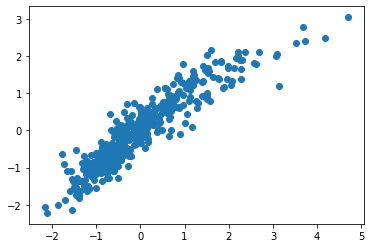

In [32]:
%matplotlib inline

# Plotting the predictions vs the test set
 
plt.scatter(y_test,y_pred)


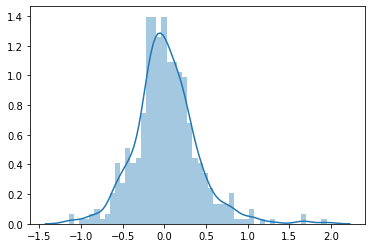

In [33]:
# Plotting the errors
sns.distplot((y_test-y_pred),bins=50)

In [59]:
# Implementing K-Fold Cross Validation

from sklearn import metrics
from sklearn.model_selection import KFold 
kf = KFold(n_splits=5, shuffle = True) 

linreg = LinearRegression()

scores = []
mse = []

for i in range(5):
    result = next(kf.split(X), None)
    X_train = X.iloc[result[0]]
    X_test = X.iloc[result[1]]
    y_train = y.iloc[result[0]]
    t_test = y.iloc[result[1]]
    model = linreg.fit(X_train,y_train)
    y_pred = linreg.predict(X_test)
    scores.append(model.score(X_test, y_test))
#     mse.append(mean_squared_error(y_test, y_pred))

print('scores from each iteration', scores)
# print('mse for each iteration', mse)
print('average k-fold score', np.mean(scores))
# print('average mse', np.mean(mse))



scores from each iteration [-0.7525042279039211, -0.8689197825652168, -0.7083497778694412, -0.7410488234631123, -0.7855623013499751]
average k-fold score -0.7712769826303333


In [35]:
# QUERY 
  # i can not do 10 fold split - is it becaaus emy underlying data is not an array but a DF?

ValueError: x and y must have same first dimension, but have shapes (5,) and (0,)

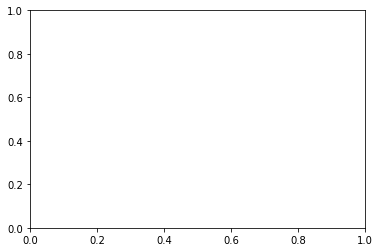

In [40]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1,6)
y = mse
plt.plot(x, y);


In [37]:
# Linear Regression model fitting

# Create a variable myScore_regression containing the cross validation score


In [38]:
myScore

NameError: name 'myScore' is not defined

In [39]:
# Plotting the accuracy

# Plot the Accuracy using the Cross validation score

## Step 6: Deployment - Import, Understand & Prepare Score Data Set

In [136]:
# Reading dataset in Score

Score = pd.read_csv('Score_Data-No_Sale_Price.csv')
Score.shape


(100, 27)

In [51]:
# Retruns shape

(100, 27)

In [52]:
# Retruns top 5 entries

,PID,LotArea,LotShape,BldgTp,OverallQuality,OverallCondition,YearBuilt,YearRemodel,VeneerExterior,BsmtFinTp,...,HalfBathHouse,FullBathHouse,BdrmAbvGrnd,RmAbvGrnd,Fireplaces,GarageTp,GarageCars,GarageArea,WdDckSqft,OpenPrchSqft
0,528445060,8987,1,1,8,5,2005,2006,226.0,0,...,0,2,2.0,6.0,1,3,3,880,144,0
1,528456160,9215,1,1,7,5,2009,2010,0.0,0,...,0,2,2.0,4.0,0,3,2,676,0,136
2,528458070,8640,1,1,7,5,2009,2009,0.0,1,...,1,2,3.0,7.0,0,3,2,614,169,45
3,906380190,6762,1,1,7,5,2006,2006,24.0,1,...,0,2,2.0,6.0,0,3,2,632,105,61
4,906385010,10402,0,1,7,5,2009,2009,0.0,0,...,0,2,3.0,6.0,0,3,3,740,0,36


In [53]:
# Retruns Columns

Index(['PID', 'LotArea', 'LotShape', 'BldgTp', 'OverallQuality',
       'OverallCondition', 'YearBuilt', 'YearRemodel', 'VeneerExterior',
       'BsmtFinTp', 'BsmtFinSqft', 'BsmtUnfinSqft', 'HeatingQC', 'FstFlrSqft',
       'SecFlrSqft', 'AbvGrndLiving', 'FullBathBsmt', 'HalfBathHouse',
       'FullBathHouse', 'BdrmAbvGrnd', 'RmAbvGrnd', 'Fireplaces', 'GarageTp',
       'GarageCars', 'GarageArea', 'WdDckSqft', 'OpenPrchSqft'],
      dtype='object')

In [137]:
# Score2 = Score[[columns]]

Score2 = df[['PID','YearBuilt','YearRemodel','VeneerExterior','HeatingQC','FstFlrSqft','AbvGrndLiving','FullBathHouse','RmAbvGrnd','OverallQuality','LotArea','BldgTp']]
Prop_Data_Final2 = df[['PID','YearBuilt','YearRemodel','VeneerExterior','HeatingQC','FstFlrSqft','AbvGrndLiving','FullBathHouse','RmAbvGrnd','OverallQuality','LotArea','BldgTp','SalePrice']]

In [106]:
Score2.head()

,PID,YearBuilt,YearRemodel,VeneerExterior,HeatingQC,FstFlrSqft,AbvGrndLiving,FullBathHouse,RmAbvGrnd,OverallQuality,LotArea,BldgTp
0,528445060,2005,2006,226.0,3,1595.0,1595,2,6.0,8,8987,1
1,528456160,2009,2010,0.0,3,1218.0,1218,2,4.0,7,9215,1
2,528458070,2009,2009,0.0,3,764.0,1547,2,7.0,7,8640,1
3,906380190,2006,2006,24.0,3,1208.0,1208,2,6.0,7,6762,1
4,906385010,2009,2009,0.0,3,1226.0,1226,2,6.0,7,10402,1


In [109]:
# Prop_Data_Final2 = Prop_Data[[columns]]

########################################
Prop_Data_Final2.head()

,PID,YearBuilt,YearRemodel,VeneerExterior,HeatingQC,FstFlrSqft,AbvGrndLiving,FullBathHouse,RmAbvGrnd,OverallQuality,LotArea,BldgTp,SalePrice
0,526301100,1960,1960,112,0,1656,1656,1,7,6,31770,1,215000
1,526350040,1961,1961,0,1,896,896,1,5,5,11622,1,105000
2,526351010,1958,1958,108,1,1329,1329,1,6,6,14267,1,172000
3,526353030,1968,1968,0,3,2110,2110,2,8,7,11160,1,244000
4,527105010,1997,1998,0,2,928,1629,2,6,5,13830,1,189900


## Step 7: Predict Target of Score Data Set

In [139]:
# Creating a linear regressor

# Declare the X and y
X = Score2
y = df['SalePrice']

# Prepare the test / train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

#printing the output and coefficients
coeff_df = pd.DataFrame(linreg.coef_,X.columns,columns=['Coefficient']) 
coeff_df

-1496856.1167287305
[-2.96048559e-06  4.46577397e+02  2.88641669e+02  2.09360296e+01
  3.39473911e+03  3.43182912e+01  6.11330946e+01 -1.01434189e+04
 -2.61073952e+03  1.59263399e+04  8.19203739e-01  1.27923493e+04]


,Coefficient
PID,-0.000003
YearBuilt,446.577397
YearRemodel,288.641669
VeneerExterior,20.936030
HeatingQC,3394.739112
FstFlrSqft,34.318291
AbvGrndLiving,61.133095
FullBathHouse,-10143.418856
RmAbvGrnd,-2610.739517
OverallQuality,15926.339900


In [ ]:
# Split into X and y

In [111]:
# Fitting linear Regression model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [140]:
# Testing linear Regression model on Score2 dataset

y_pred = linreg.predict(X_test) 

import sklearn.metrics

MSE = mean_squared_error(y_test, y_pred)
RSq = r2_score(y_test, y_pred)
print(MSE)
print(RSq)

print(model.score(X_test, y_test))

624024745.3468225
0.8551364167822667


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 13 is different from 12)

## Step 8: Prepare & Export (save) Required DataFrame

In [116]:
# Dropping columns except PID in Score2

In [120]:
# Appending the precitions NumPy array 'Scored2' to the Pandas DataFrame 'Score2'
Score2['SalePrice'] = Scored2[:]
Score2.head()

,PID,SalePrice
0,528445060,255563.813486
1,528456160,205967.764228
2,528458070,201744.139225
3,906380190,196436.350297
4,906385010,202716.520035


In [118]:
# Saving the dataset to a .csv file
Score2.to_csv('scoreddata.csv')

##### Congratulations! You nailed it!